In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, RFE, f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.externals import joblib
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',10000)
df = pd.read_csv('/Users/mattlee/GA-Capstone-Project/FEdf1.csv')
df.head()

,Name,Team,PPG,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Year,NBATeam,CollegeName,...,PERVORP,TotalWV,MPG3,FTMSR,3PMSR,ORBSR,DRBL,APGCR,SPGSR,TOVSR,Age at Draft SR,Height Inches C,TotalWSSR,TotalPCAWSSR,TotalPERWSSR,TotalWSBPMSR,TotalWSBPMVCR,PERVORPCR,Games Played 4,TotalOff,FTASR,FT%C,3PASR,3P%R,RPGSR
0,A.J. Price,UConn,12.466667,33.000000,29.30,4.166667,10.10,0.410667,2.633333,3.600000,0.719000,1.50,4.166667,0.348,0.800,2.433333,3.233333,4.566667,1.066667,0.066667,2.300000,1.300000,2009.0,IND,University of Connecticut,...,0.532868,0.739942,25153.757000,1.622755,1.224745,0.894427,0.889262,1.659077,1.032796,1.516575,506.25,405224.0,1.074640,NaN,0.692077,0.788659,0.912516,0.810724,1.185921e+06,1.731432,1.897367,0.371695,2.041241,1.000053,1.798147
1,Aaron Gray,PITT,8.750000,28.250000,18.40,3.425000,6.25,0.554250,1.900000,3.175000,0.590500,0.00,0.000000,0.000,2.275,3.975000,6.275000,1.175000,0.300000,1.025000,1.350000,1.975000,2007.0,CHI,University of Pittsburgh,...,0.592658,0.758726,6229.504000,1.378405,0.000000,1.508310,1.380025,1.055227,0.547723,1.161895,497.29,614125.0,1.141701,NaN,0.736290,0.843103,0.951634,0.839978,6.369038e+05,2.684290,1.781853,0.205902,0.000000,inf,2.504995
2,Al Horford,UF,9.866667,36.333333,25.50,3.766667,6.40,0.565333,2.433333,3.966667,0.612333,0.00,0.066667,0.000,2.300,5.500000,7.766667,1.633333,0.833333,1.700000,1.533333,2.433333,2007.0,ATL,University of Florida,...,1.070043,0.989856,16581.375000,1.559915,0.000000,1.516575,1.704748,1.177674,0.912871,1.238278,432.64,551368.0,1.544184,0.641559,1.092341,1.146499,1.200006,1.022823,1.742693e+06,2.954779,1.991649,0.229596,0.258199,inf,2.786874
3,Al-Farouq Aminu,WF,13.300000,31.000000,30.15,4.650000,9.80,0.481500,3.600000,5.200000,0.684500,0.40,1.550000,0.226,3.050,5.650000,8.700000,1.300000,1.150000,1.250000,2.650000,2.550000,2010.0,LAC,Wake Forest University,...,0.641763,0.837860,27407.028375,1.897367,0.632456,1.746425,1.731656,1.091393,1.072381,1.627882,380.25,512000.0,1.218966,NaN,0.782726,0.918758,1.021253,0.862564,9.235210e+05,2.034810,2.280351,0.320716,1.244990,1.000074,2.949576
4,Alec Burks,UCOL,18.450000,34.000000,30.80,6.100000,12.20,0.503000,5.650000,7.100000,0.798500,0.65,2.150000,0.322,2.100,3.500000,5.650000,2.300000,1.150000,0.350000,2.200000,2.350000,2011.0,UTA,University of Colorado,...,0.626673,0.786119,29218.112000,2.376973,0.806226,1.449138,1.252763,1.320006,1.072381,1.483240,388.09,474552.0,1.163819,NaN,0.793285,0.853113,0.957048,0.855750,1.336336e+06,2.392888,2.664583,0.509125,1.466288,1.000057,2.376973


In [3]:
def rundefaultmodels(x,y,xtest,ytest):
    ln = LinearRegression()
    modelln = ln.fit(x,y)
    predictionsln = modelln.predict(xtest)
    print 'Linear Regression'
    print 'Cross-validation score:', cross_val_score(modelln, x,y)
    print 'Training R^2:', modelln.score(x,y)
    print 'Test R^2:', modelln.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsln)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsln)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsln))
    print '\n'
    
    ls = LassoCV()
    modells = ls.fit(x,y)
    predictionsls = modells.predict(xtest)
    print 'Lasso Regression'
    print 'Cross-validation score:', cross_val_score(modells, x,y)
    print 'Training R^2:', modells.score(x,y)
    print 'Test R^2:', modells.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsls)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsls)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsls))
    print '\n'
    
    rg = RidgeCV()
    modelrg = rg.fit(x,y)
    predictionsrg = modelrg.predict(xtest)
    print 'Ridge Regression'
    print 'Cross-validation score:', cross_val_score(modelrg, x,y)
    print 'Training R^2:', modelrg.score(x,y)
    print 'Test R^2:', modelrg.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsrg)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsrg)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsrg))
    print '\n'
    
    knn = KNeighborsRegressor()
    modelknn = knn.fit(x,y)
    predictionsknn = modelknn.predict(xtest)
    print 'K-Nearest Neighbors Regression'
    print 'Cross-validation score:', cross_val_score(modelknn, x,y)
    print 'Training R^2:', modelknn.score(x,y)
    print 'Test R^2:', modelknn.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsknn)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsknn)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsknn))
    print '\n'
    
    dt = DecisionTreeRegressor()
    modeldt = dt.fit(x,y)
    predictionsdt = modeldt.predict(xtest)
    print 'Decision Tree Regression'
    print 'Cross-validation score:', cross_val_score(modeldt, x,y)
    print 'Training R^2:', modeldt.score(x,y)
    print 'Test R^2:', modeldt.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsdt)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsdt)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsdt))
    print '\n'
    
    rf = RandomForestRegressor()
    modelrf = rf.fit(x,y)
    predictionsrf = modelrf.predict(xtest)
    print 'Random Forest Regression'
    print 'Cross-validation score:', cross_val_score(modelrf, x,y)
    print 'Training R^2:', modelrf.score(x,y)
    print 'Test R^2:', modelrf.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsrf)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsrf)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsrf))
    print '\n'
    
    et = ExtraTreesRegressor()
    modelet = et.fit(x,y)
    predictionset = modelet.predict(xtest)
    print 'Extra Trees Regression'
    print 'Cross-validation score:', cross_val_score(modelet, x,y)
    print 'Training R^2:', modelet.score(x,y)
    print 'Test R^2:', modelet.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionset)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionset)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionset))
    print '\n'
    
    ada = AdaBoostRegressor()
    modelada = ada.fit(x,y)
    predictionsada = modelada.predict(xtest)
    print 'AdaBoost Regression'
    print 'Cross-validation score:', cross_val_score(modelada, x,y)
    print 'Training R^2:', modelada.score(x,y)
    print 'Test R^2:', modelada.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsada)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsada)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsada))
    print '\n'
    
    gb = GradientBoostingRegressor()
    modelgb = gb.fit(x,y)
    predictionsgb = modelgb.predict(xtest)
    print 'GradientBoost Regression'
    print 'Cross-validation score:', cross_val_score(modelgb, x,y)
    print 'Training R^2:', modelgb.score(x,y)
    print 'Test R^2:', modelgb.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsgb)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsgb)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsgb))
    print '\n'
    
    bag = BaggingRegressor()
    modelbag = bag.fit(x,y)
    predictionsbag = modelbag.predict(xtest)
    print 'Bagging Regression'
    print 'Cross-validation score:', cross_val_score(modelbag, x,y)
    print 'Training R^2:', modelbag.score(x,y)
    print 'Test R^2:', modelbag.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsbag)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsbag)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsbag))
    print '\n'
    
    xgb = XGBRegressor()
    modelxgb = xgb.fit(x,y)
    predictionsxgb = modelxgb.predict(xtest)
    print 'XGBoost Regression'
    print 'Cross-validation score:', cross_val_score(modelxgb, x,y)
    print 'Training R^2:', modelxgb.score(x,y)
    print 'Test R^2:', modelxgb.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsxgb)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsxgb)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsxgb))
    print '\n'

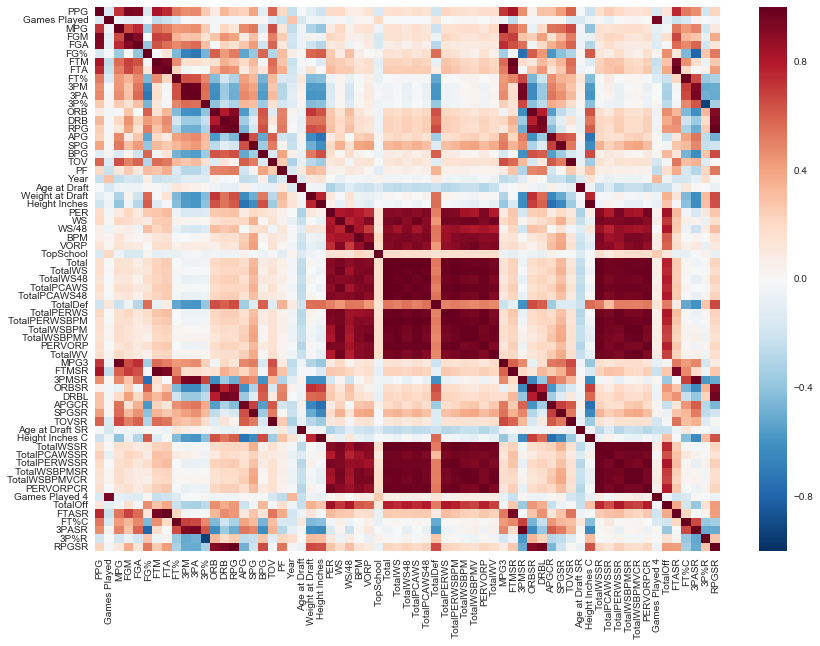

In [83]:
plt.subplots(figsize=(14,10))
sns.heatmap(df.corr())

In [84]:
df.columns

Index([u'Name', u'Team', u'PPG', u'Games Played', u'MPG', u'FGM', u'FGA',
       u'FG%', u'FTM', u'FTA', u'FT%', u'3PM', u'3PA', u'3P%', u'ORB', u'DRB',
       u'RPG', u'APG', u'SPG', u'BPG', u'TOV', u'PF', u'Year', u'NBATeam',
       u'CollegeName', u'Age at Draft', u'Weight at Draft', u'Height Inches',
       u'PER', u'WS', u'WS/48', u'BPM', u'VORP', u'TopSchool', u'Total',
       u'TotalWS', u'TotalWS48', u'TotalPCAWS', u'TotalPCAWS48', u'TotalDef',
       u'TotalPERWS', u'TotalPERWSBPM', u'TotalWSBPM', u'TotalWSBPMV',
       u'PERVORP', u'TotalWV', u'MPG3', u'FTMSR', u'3PMSR', u'ORBSR', u'DRBL',
       u'APGCR', u'SPGSR', u'TOVSR', u'Age at Draft SR', u'Height Inches C',
       u'TotalWSSR', u'TotalPCAWSSR', u'TotalPERWSSR', u'TotalWSBPMSR',
       u'TotalWSBPMVCR', u'PERVORPCR', u'Games Played 4', u'TotalOff',
       u'FTASR', u'FT%C', u'3PASR', u'3P%R', u'RPGSR'],
      dtype='object')

In [352]:
x = df[['PPG','Games Played 4','MPG3','FGM','FG%','FTMSR','FT%C','3PMSR','RPG','APGCR','SPGSR','TOVSR',
       'PF','Age at Draft SR','Weight at Draft','Height Inches C','TopSchool','BPG']]
y = df['TotalWS']

In [9]:
def skb(x,y,features):
    kbest = SelectKBest(score_func= mutual_info_regression, k = features)
    kbest_columns = kbest.fit_transform(x,y)
    mask = kbest.get_support() #list of booleans
    new_features = [] # The list of your K best features
    for bool, feature in zip(mask, x.columns):
        if bool:
            new_features.append(feature)
    dfkbest = pd.DataFrame(kbest_columns, columns = new_features)
    scores = zip(x.columns,list(kbest.scores_))
    return dfkbest, scores
#made a function that can manually iterate number of desired KBest features

In [360]:
lr = LinearRegression()
score_dict = {}
for rng in range(1,19):
    dfkbest, scores = skb(x,y,rng)
    x_train, x_test, y_train, y_test = train_test_split(dfkbest, y,
                                                   test_size=0.35)
    modellr = lr.fit(x_train, y_train)
    
    score_dict[rng] = (modellr.score(x_train, y_train),modellr.score(x_test, y_test))
score_dict
#test out scores on how many features used

{1: (0.032253460075168161, 0.08117102804601628),
 2: (0.016419777977894623, 0.077661014138534878),
 3: (0.047356320372412886, -0.10002109118758207),
 4: (0.12799672834235121, -0.01962112185261744),
 5: (0.16379632932372279, 0.083718518061119851),
 6: (0.18094198616399282, 0.097115227131050252),
 7: (0.12514826279709068, 0.07390148922744777),
 8: (0.35585110382501473, 0.051612131634598657),
 9: (0.32874764271092483, 0.19726176017786812),
 10: (0.33420350729600068, 0.27485575220385938),
 11: (0.35559247241616798, 0.04113184990786567),
 12: (0.36131831715400298, 0.23027850519482784),
 13: (0.32399874438346377, 0.29143492799210091),
 14: (0.38825841280727635, 0.078741225122266889),
 15: (0.29483271984362103, 0.34461996058900418),
 16: (0.3742312294499176, 0.39175412863159587),
 17: (0.43293619539064343, 0.29851543586963192),
 18: (0.49974546330358133, 0.10739483693481022)}

In [361]:
dfkbest, scores = skb(x,y,16)

In [362]:
scores

[('PPG', 0.044220977075721812),
 ('Games Played 4', 0.0),
 ('MPG3', 0.0),
 ('FGM', 0.09599765948723693),
 ('FG%', 0.016348795371665226),
 ('FTMSR', 0.12256659550451188),
 ('FT%C', 0.0045382726628213632),
 ('3PMSR', 0.033144087258770494),
 ('RPG', 0.015142130978311741),
 ('APGCR', 0.0),
 ('SPGSR', 0.021966538540979741),
 ('TOVSR', 0.042613136020700715),
 ('PF', 0.0),
 ('Age at Draft SR', 0.043621848207281211),
 ('Weight at Draft', 0.0),
 ('Height Inches C', 0.0),
 ('TopSchool', 0.044540940209778945),
 ('BPG', 0.0039146499349236308)]

In [363]:
dfkbest.columns

Index([u'PPG', u'FGM', u'FG%', u'FTMSR', u'FT%C', u'3PMSR', u'RPG', u'APGCR',
       u'SPGSR', u'TOVSR', u'PF', u'Age at Draft SR', u'Weight at Draft',
       u'Height Inches C', u'TopSchool', u'BPG'],
      dtype='object')

In [407]:
x_train, x_test, y_train, y_test = train_test_split(dfkbest,y,test_size = 0.35)

In [412]:
gsln = GridSearchCV(LinearRegression(),param_grid={})

In [413]:
gsln.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [414]:
print gsln.best_estimator_.score(x_train, y_train)
print gsln.best_estimator_.score(x_test, y_test)

0.356923012467
0.400411826863


In [421]:
zipped2 = zip(dfkbest.columns,gsln.best_estimator_.coef_)
zipped2.sort(key = lambda t: t[1], reverse = True)
zipped2

[('FG%', 2.0797179974215498),
 ('APGCR', 0.88068788116211183),
 ('SPGSR', 0.66568045979762946),
 ('FT%C', 0.092234004658862459),
 ('PPG', 0.081933197317411777),
 ('RPG', 0.072770266389588292),
 ('TopSchool', 0.062337827034192092),
 ('PF', 0.037839193456633557),
 ('FTMSR', 0.035200816388020147),
 ('Weight at Draft', 0.00062287209546119104),
 ('Height Inches C', 1.1230308040177661e-06),
 ('Age at Draft SR', -0.002553220233914022),
 ('3PMSR', -0.046628343104773429),
 ('BPG', -0.05327667639117617),
 ('FGM', -0.26230907807501813),
 ('TOVSR', -0.69152491466684163)]

In [415]:
joblib.dump(gsln.best_estimator_, 'OVR_LR.pkl')

['OVR_LR.pkl']

In [409]:
rg1 = RidgeCV(alphas = [0.001,0.01,0.1,1.0,10])
rg1.fit(x_train,y_train)
print rg1.score(x_train, y_train)
print rg1.score(x_test, y_test)

0.353888956954
0.385199480796


In [420]:
zipped1 = zip(dfkbest.columns,rg1.coef_)
zipped1.sort(key = lambda t: t[1], reverse = True)
zipped1

[('FG%', 1.2777753749777752),
 ('APGCR', 0.82284194709750569),
 ('SPGSR', 0.66458062393390804),
 ('FT%C', 0.10002430860066891),
 ('PPG', 0.088723558150235249),
 ('RPG', 0.071290912140753449),
 ('TopSchool', 0.069495133807182086),
 ('PF', 0.039477589383775324),
 ('FTMSR', 0.0078724606311180167),
 ('Weight at Draft', 0.00061782923853570537),
 ('Height Inches C', 1.1187512427568436e-06),
 ('Age at Draft SR', -0.0025219297451215539),
 ('BPG', -0.055337715793221776),
 ('3PMSR', -0.11924037664877574),
 ('FGM', -0.2665755742689413),
 ('TOVSR', -0.66156563251826395)]

In [457]:
rg1predict = (rg1.predict(x_test))
pre = pd.DataFrame(rg1predict, columns = ['Predictions'])
forpredf = pd.DataFrame(y_test).reset_index(drop = True)
pre1 = pre.merge(forpredf, left_index=True, right_index=True)
pre1.head()

,Predictions,TotalWS
0,1.427984,1.343079
1,1.916726,1.727395
2,1.539241,1.214493
3,1.278553,1.232636
4,1.346248,1.116272


In [483]:
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rg1predict))

RMSE: 0.413471998413


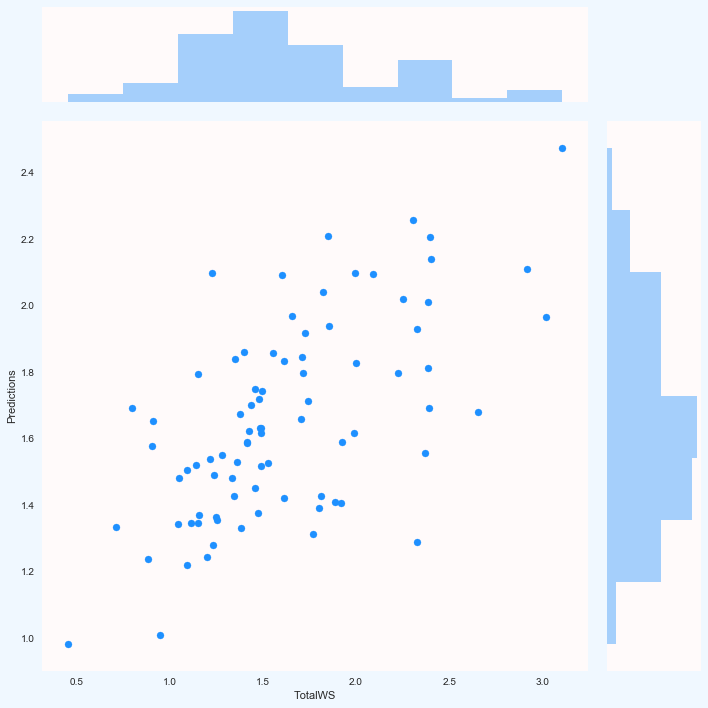

In [493]:
sns.set(rc={'axes.facecolor':'snow', 'figure.facecolor':'aliceblue','axes.grid':False})

sns.jointplot(x = 'TotalWS', y = 'Predictions', data = pre1, kind = 'scatter',
              color = 'dodgerblue', stat_func = None, size = 10)

In [428]:
coef = pd.DataFrame(rg1.coef_,dfkbest.columns, columns = ['Coefficients'])
coef.sort_values(by = 'Coefficients', ascending = False)

,Coefficients
FG%,1.277775
APGCR,0.822842
SPGSR,0.664581
FT%C,0.100024
PPG,0.088724
RPG,0.071291
TopSchool,0.069495
PF,0.039478
FTMSR,0.007872
Weight at Draft,0.000618


In [416]:
joblib.dump(rg1, 'OVR_rg1.pkl')

['OVR_rg1.pkl']

In [410]:
ls1 = LassoCV(alphas = [0.001,0.01,0.1,1.0,10])
ls1.fit(x_train, y_train)
print ls1.score(x_train, y_train)
print ls1.score(x_test, y_test)

0.352016661814
0.38006155048


In [419]:
zipped = zip(dfkbest.columns,ls1.coef_)
zipped.sort(key = lambda t: t[1], reverse = True)
zipped

[('FG%', 1.237828175932594),
 ('APGCR', 0.77900379299937705),
 ('SPGSR', 0.63805274559427227),
 ('PPG', 0.086235610777837549),
 ('RPG', 0.070693823073757364),
 ('TopSchool', 0.056373400120238074),
 ('PF', 0.02842853167823485),
 ('FTMSR', 0.01858317117584703),
 ('Weight at Draft', 0.00068639561168528187),
 ('Height Inches C', 1.0669700778300689e-06),
 ('FT%C', 0.0),
 ('Age at Draft SR', -0.002492405156512883),
 ('BPG', -0.057396698171696528),
 ('3PMSR', -0.092330550896171509),
 ('FGM', -0.26291112358152907),
 ('TOVSR', -0.58674503071667317)]

In [417]:
joblib.dump(ls1, 'OVR_ls1.pkl')

['OVR_ls1.pkl']

Below is just scrap work, please ignore
==

In [54]:
rg = RidgeCV(alphas = [0.001,0.01,0.1,1.0,10])
score_dict = {}
for rng in range(1,17):
    dfkbest1, scores1 = skb(x,y,rng)
    x_train1, x_test1, y_train1, y_test1 = train_test_split(dfkbest1, y,
                                                   test_size=0.35)
    modelrg = rg.fit(x_train1, y_train1)
    
    score_dict[rng] = (modelrg.score(x_train1, y_train1),modelrg.score(x_test1, y_test1))
score_dict
#test out scores on how many features used

{1: (0.055143885950000859, 0.038494371000988847),
 2: (0.045498922735399461, 0.0061447665400317097),
 3: (0.1056561171439697, 0.10789909898319328),
 4: (0.14217349121647327, 0.0092353369735342916),
 5: (0.15320711608569104, -0.020050822705869775),
 6: (0.12076423089539336, 0.039670228696564336),
 7: (0.24799920121587227, 0.18927344771657517),
 8: (0.19450312570248085, 0.2418966078223258),
 9: (0.16636489239872332, 0.28985523179484018),
 10: (0.31091059330930193, 0.19789528844863657),
 11: (0.38050045220014828, 0.033524746738633593),
 12: (0.22922922413372349, 0.25157435132261485),
 13: (0.36452270067537085, 0.28478543931123224),
 14: (0.33168527558439087, 0.3350683356203274),
 15: (0.31527561473246946, 0.42623761853819364),
 16: (0.43065884951986694, 0.22968750582704245)}

In [55]:
dfkbest1, scores1 = skb(x,y,15)

In [72]:
scores1

[('PPG', 0.044826840995715767),
 ('Games Played 4', 0.0),
 ('MPG3', 0.0),
 ('FGM', 0.097826215227120539),
 ('FG%', 0.013728501712464869),
 ('FTMSR', 0.11889456655241304),
 ('FT%C', 0.0048756563895748783),
 ('3PMSR', 0.026333608721886392),
 ('ORBSR', 0.0),
 ('APGCR', 0.0),
 ('SPGSR', 0.023144375543770135),
 ('TOVSR', 0.035755046568596072),
 ('PF', 0.0),
 ('Age at Draft SR', 0.043015699386513173),
 ('Weight at Draft', 0.0),
 ('Height Inches C', 0.0)]

In [57]:
dfkbest1.columns

Index([u'PPG', u'MPG3', u'FGM', u'FG%', u'FTMSR', u'FT%C', u'3PMSR', u'ORBSR',
       u'APGCR', u'SPGSR', u'TOVSR', u'PF', u'Age at Draft SR',
       u'Weight at Draft', u'Height Inches C'],
      dtype='object')

In [121]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(dfkbest1,y,test_size = 0.35)

In [122]:
rg = RidgeCV(alphas = [0.001,0.01,0.1,1.0,10])
rg.fit(x_train1,y_train1)
print rg.score(x_train1, y_train1)
print rg.score(x_test1, y_test1)

0.364346956381
0.417610588673


In [257]:
ln1 = LinearRegression()
ln1.fit(x_train1, y_train1)
print ln1.score(x_train1, y_train1)
print ln1.score(x_test1, y_test1)

0.368401921368
0.426871080573


In [258]:
ls2 = LassoCV(alphas = [0.001,0.01,0.1,1.0,10])
ls2.fit(x_train1, y_train1)
print ls2.score(x_train1, y_train1)
print ls2.score(x_test1, y_test1)

0.361743348143
0.434955417275


In [ ]:
trainpredln = ln1.predict(x_train1)
trainpredrg = rg.predict(x_train1)
trainpredls = ls2.predict(x_train1)
dic = {}

In [69]:
ls = LassoCV(alphas = [0.001,0.01,0.1,1.0,10])
score_dict = {}
for rng in range(1,17):
    dfkbest2, scores2 = skb(x,y,rng)
    x_train2, x_test2, y_train2, y_test2 = train_test_split(dfkbest2, y,
                                                   test_size=0.35)
    modelrg = rg.fit(x_train2, y_train2)
    
    score_dict[rng] = (modelrg.score(x_train2, y_train2),modelrg.score(x_test2, y_test2))
score_dict
#test out scores on how many features used

{1: (0.072313837127968128, -0.12860087591930314),
 2: (0.032524798675556243, 0.025088792960385908),
 3: (0.0516459442956455, -0.0070669301125207973),
 4: (0.12158153682512617, 0.065321698949661222),
 5: (0.12486099060692457, 0.049456165317360412),
 6: (0.12807159879454, 0.092955833700794521),
 7: (0.29503781151838415, 0.1151447026707515),
 8: (0.23357647549057214, 0.30238515461450854),
 9: (0.28755519493707948, 0.21854697861434957),
 10: (0.20726636605512871, 0.28307665720795216),
 11: (0.38066206153095183, -0.068227827859798973),
 12: (0.31980123079368461, 0.10823775697897109),
 13: (0.25744161713653668, 0.34161702330368393),
 14: (0.39400731030153868, -0.0098072873663428428),
 15: (0.3634887716720937, 0.38508314128296012),
 16: (0.39583756734794995, 0.34244510486705104)}

In [70]:
dfkbest2, scores2 = skb(x,y,15)

In [71]:
scores2

[('PPG', 0.046515489243359021),
 ('Games Played 4', 0.0),
 ('MPG3', 0.0),
 ('FGM', 0.093798510256184464),
 ('FG%', 0.016446086070185828),
 ('FTMSR', 0.12270360847482786),
 ('FT%C', 0.0047745051334184829),
 ('3PMSR', 0.026432413757863316),
 ('ORBSR', 0.0),
 ('APGCR', 0.0),
 ('SPGSR', 0.02361187978834467),
 ('TOVSR', 0.039246207078239337),
 ('PF', 0.0),
 ('Age at Draft SR', 0.04159362553974999),
 ('Weight at Draft', 0.0),
 ('Height Inches C', 0.0)]

In [73]:
dfkbest2.columns

Index([u'PPG', u'MPG3', u'FGM', u'FG%', u'FTMSR', u'FT%C', u'3PMSR', u'ORBSR',
       u'APGCR', u'SPGSR', u'TOVSR', u'PF', u'Age at Draft SR',
       u'Weight at Draft', u'Height Inches C'],
      dtype='object')

In [184]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(dfkbest2,y,test_size = 0.35)

In [185]:
ls = LassoCV(alphas = [0.001,0.01,0.1,1.0,10])
ls.fit(x_train2, y_train2)
print ls.score(x_train2, y_train2)
print ls.score(x_test2, y_test2)

0.382847098725
0.395546626791


In [259]:
rg2 = RidgeCV(alphas = [0.001,0.01,0.1,1.0,10])
rg2.fit(x_train2,y_train2)
print rg2.score(x_train2, y_train2)
print rg2.score(x_test2, y_test2)

0.343393796128
0.371151821098


In [260]:
ln2 = LinearRegression()
ln2.fit(x_train2, y_train2)
print ln2.score(x_train2, y_train2)
print ln2.score(x_test2, y_test2)

0.389971498979
0.381200490231


In [186]:
predictionsln = ln.predict(x_test)
predictionsrg = rg.predict(x_test1)
predictionsls = ls.predict(x_test2)

In [188]:
d = {'LinearPred': predictionsln,
    'RidgeCVPred': predictionsrg,
    'LassoCVPred': predictionsls}
pred = pd.DataFrame.from_dict(d)

In [250]:
target = pd.DataFrame(y_test)

In [251]:
pred1 = pred.merge(target, left_index=True, right_index=True)

In [252]:
pred1.head()

,LassoCVPred,LinearPred,RidgeCVPred,TotalWS
60,1.894462,1.605649,2.221597,2.276406
67,1.727710,1.103618,1.591103,1.058064
38,1.738385,1.779059,1.486428,1.414325
8,1.650368,1.858015,1.303927,0.530262
82,1.583146,1.983100,2.129989,2.398064


In [202]:
xpred = pred1[['LassoCVPred','LinearPred','RidgeCVPred']]
ypred = pred1['TotalWS']

In [203]:
x_trainp, x_testp, y_trainp, y_testp = train_test_split(xpred,ypred,test_size =0.35)

In [232]:
pred1['AVG'] = pred1[['LassoCVPred','LinearPred','RidgeCVPred']].mean(axis = 1)

In [235]:
metrics.r2_score(pred1['TotalWS'],pred1['AVG'])

-0.32905572292772911

In [236]:
metrics.mean_squared_error(pred1['TotalWS'],pred1['AVG'])

0.44401522952194056

In [240]:
names = df[['Name','Team']].merge(pred1[['LassoCVPred','LinearPred','RidgeCVPred']], left_index = True, 
                                  right_index = True)

In [241]:
names.head()

,Name,Team,LassoCVPred,LinearPred,RidgeCVPred
0,A.J. Price,UConn,1.758375,1.386476,1.014273
1,Aaron Gray,PITT,1.440590,1.323929,1.146272
2,Al Horford,UF,0.856177,1.177713,2.185728
3,Al-Farouq Aminu,WF,2.314099,2.143435,2.257304
4,Alec Burks,UCOL,1.905359,1.146369,2.019202


In [243]:
allpredictionsln = ln.predict(x[dfkbest.columns])
allpredictionsrg = rg.predict(x[dfkbest1.columns])
allpredictionsls = ls.predict(x[dfkbest1.columns])